In [1]:
import jsonlines
import ast
from langchain_openai import ChatOpenAI
from langchain.prompts import ChatPromptTemplate
import os
from collections import Counter
from itertools import chain
import json

thages_key = os.environ['THAGES_API_KEY']


In [7]:
legislatur = 20

alleReden = []
with jsonlines.open(f'../../data/speeches_{legislatur}.jsonl') as f:
    for line in f.iter():
        #for line in list(f):
        alleReden.append(line)

alleReden.sort(key = lambda x:x['date'])
len(alleReden)
rede = alleReden[11111]

In [8]:
topics = ['Zuwanderung und Flucht', 'Energiepolitik und Energiemanagement', 'Wirtschaftslage', 'Inflation', 'Gesundheitswesen', 'Bildung', 'Wohnen und Mieten', 'Verkehr und Mobilität', 'Soziale Ungleichheit', 'Digitalisierung', 'Rente und Altersvorsorge', 'Sicherheit und Terrorismus', 'Künstliche Intelligenz', 'Cybersicherheit', 'Globalisierung', 'Europäische Union', 'Forschung und Innovation', 'Klimaschutz', 'Arbeitsmarkt', 'Integration', 'Außenpolitik', 'Kultur und Kunst', 'Familienpolitik', 'Geschlechtergerechtigkeit', 'Sport und Freizeit', 'Konsumverhalten', 'Medien und Kommunikation', 'Rechtsextremismus', 'Demokratie und Partizipation', 'Jugendpolitik', 'Städteentwicklung', 'Landwirtschaft', 'Infrastrukturprojekte', 'Finanzpolitik', 'Krise und Katastrophenmanagement', 'Friedenspolitik', 'Tierschutz', 'Mittelstand und KMU', 'Bildungsgerechtigkeit', 'Tourismus', 'Kommunalpolitik', 'Ehrenamt und Zivilgesellschaft', 'Verteidigung', 'Sonstige Themen']

descriptions = ['Der Umgang mit Migration, Asyl und Integration ', 'Die Aufrechterhaltung und Ausbau von Erneuerbaren Energien sowie fossiler Energieträger', 'Die wirtschaftliche Stabilität ist zentrales Anliegen.', 'Bekämpfung und Steuerung der Inflation sind zentrale Anliegen ', 'Verbesserungen im Gesundheitssystem und die Bewältigung der Folgen der Pandemie stehen im Fokus.', 'Reformen und Investitionen im Bildungssektor, Förderung von Chancengleichheit und Erhöhung der Bildungsqualität', 'Wohnungsnot, Bauvorhaben und steigende Mietpreise stehen im Fokus', 'Der Ausbau nachhaltiger Verkehrsnetze und die Förderung von E-Mobilität sind wichtige Themen.', 'Maßnahmen zur Bekämpfung der sozialen Ungleichheit und zur Förderung der sozialen Gerechtigkeit.', 'Fortschritte in der Digitalisierung und die Förderung von digitaler Infrastruktur.', 'Sicherung der Renten und Anpassungen an demografische Veränderungen.', 'Innere Sicherheit und Maßnahmen gegen Terrorismus.', 'Regulierung und Integration von KI in den Alltag und die Arbeitswelt.', 'Schutz vor Cyberangriffen und Datenschutz.', 'Auswirkungen der Globalisierung auf die deutsche Wirtschaft und Gesellschaft.', 'Die Rolle Deutschlands in der EU und die Europawahlen.', 'Förderung von Wissenschaft und technologischen Innovationen.', 'Maßnahmen zum Schutz der Klima, Natur, Umwelt und  Biodiversität für eine nachhaltige Umwelt', 'Herausforderungen und Chancen im Arbeitsmarkt, insbesondere durch Automatisierung und KI.', 'Erfolgreiche Integration von Geflüchteten und Minderheiten in die Gesellschaft und den Arbeitsmarkt.', 'Deutschlands Rolle in der internationalen Politik und Beziehungen zu anderen Ländern.', 'Förderung von Kultur und Kunst sowie deren Zugang für alle Bevölkerungsschichten.', 'Unterstützung von Familien und Kinderbetreuung.', 'Förderung der Gleichstellung der Geschlechter.', 'Organisation und Förderung von Sportereignissen', 'Veränderungen im Konsumverhalten und deren Auswirkungen.', 'Veränderungen in der Medienlandschaft und die Rolle der sozialen Medien.', 'Bekämpfung von Rechtsextremismus und Rassismus.', 'Stärkung der demokratischen Strukturen und Bürgerbeteiligung.', 'Förderung von Jugendprojekten und Partizipationsmöglichkeiten für junge Menschen.', 'Nachhaltige Entwicklung und Planung von Städten.', 'Zukunft der Landwirtschaft und nachhaltige Agrarwirtschaft.', 'Ausbau und Modernisierung der deutschen Infrastruktur.', 'Maßnahmen zur Haushaltskonsolidierung und Steuerpolitik sowie Regulierung der Finanzmärkte', 'Vorbereitungen und Maßnahmen zur Bewältigung von Krisen.', 'Einsatz für internationale Friedensbemühungen.', 'Maßnahmen zum Schutz von Tieren und Tierrechten.', 'Unterstützung für kleine und mittlere Unternehmen.', 'Maßnahmen zur Förderung der Chancengleichheit im Bildungsbereich.', 'Förderung und nachhaltige Entwicklung des Tourismus.', 'Herausforderungen und Chancen auf kommunaler Ebene.', 'Unterstützung und Förderung des ehrenamtlichen Engagements.', 'Gewährleistung der nationale Sicherheit durch eine Kombination aus diplomatischen, militärischen und zivilen Maßnahmen sowie durch die Zusammenarbeit mit internationalen Partnern.', 'bspw. Geschäftsordnung etc. also alles was den oberen Themen nicht zuordnungsbar ist.']

In [9]:
base_url = 'http://thages.philosophie.kit.edu:8080/v1'



In [10]:
num_topics = 3
topic_descriptions = "\n".join(
    [f"[{topic}]: {desc}" for topic, desc in zip(topics, descriptions)]
)

topics_prompt = "\n".join(
    [f"{tx+1}. {topic}" for tx,topic in enumerate(topics)]
)

#rede=alleReden[21000]['text']

system_msg = f"Du bist ein politischer Themenanalyst." 
f"Du bist darauf spezialisiert, Bundestagsreden präzise nach vordefinierten Themen zu klassifizieren."
f"""Die vordefinierten Themen mit einer kurzen Beschreibung findest du hier:
{topic_descriptions}.
"""
f"Bitte wähle nur aus diesen vordefinierten Themen. Keine Beschreibungen!"

user_msg = f'''Ordne eine Rede aus dem deutschen Bundestag thematisch einer Kategorie zu. Hier sind die Kategorien als python-Liste {topics}. Gib ausschließlich die {num_topics} relevantesten Kategorien in dieser Liste zurück. Bitte als Output nur eine python-Liste. Keine Beschreibungen oder Erläuterungen!

Rede:
{rede['text']}
'''

#print(user_msg)

In [11]:
llm = ChatOpenAI(
    model = "meta-llama/Llama-3.1-8B-Instruct",
    base_url=base_url,
    openai_api_key=thages_key,
    max_tokens=2048,
    n=10
)

messages=[
    {
        "role": "system",
        "content": system_msg
    },
    {
        "role": "user",
        "content": user_msg
    }
]

response = llm.invoke(messages)
print(response.content)

['Zuwanderung und Flucht', 'Gesundheitswesen', 'Wohnen und Mieten']


In [50]:
num_samples = 5
all_cats = []
failed = 0
for sample in range(num_samples):
    try:
        llm = ChatOpenAI(
            model = "meta-llama/Llama-3.1-8B-Instruct",
            base_url=base_url,
            openai_api_key=thages_key,
            max_tokens=2096
        )
        response = llm.invoke(messages)
        cats = ast.literal_eval(response.content)
        if isinstance(cats, list):       
            all_cats.append(cats)
        else:
            failed += 1
            continue
    except Exception as e:
        print(f"[Sample {sample+1}] Error: {e}")
        failed += 1
        continue  
    print(cats)    
# Flatten and count
flat = list(chain.from_iterable(all_cats))
counter = Counter(flat)
total = sum(counter.values())
counter = {k: v * num_topics / total for k, v in counter.items()}
sorted_topics = dict(sorted(counter.items(), key=lambda x: x[1], reverse=True))
    
print(sorted_topics)
print(failed)

['Arbeitsmarkt', 'Finanzpolitik', 'Klimaschutz']
['Verkehr und Mobilität', 'Wirtschaftslage', 'Gesundheitswesen']
['Wirtschaftslage', 'Arbeitsmarkt', 'Infrastrukturprojekte']
['Zuwanderung und Flucht', 'Wohnen und Mieten', 'Arbeitsmarkt']
['Zuwanderung und Flucht', 'Wirtschaftslage', 'Arbeitsmarkt']
{'Arbeitsmarkt': 0.8, 'Wirtschaftslage': 0.6, 'Zuwanderung und Flucht': 0.4, 'Finanzpolitik': 0.2, 'Klimaschutz': 0.2, 'Verkehr und Mobilität': 0.2, 'Gesundheitswesen': 0.2, 'Infrastrukturprojekte': 0.2, 'Wohnen und Mieten': 0.2}
0


# The big loop

In [6]:

num_topics = 3

topic_descriptions = "\n".join(
    [f"[{topic}]: {desc}" for topic, desc in zip(topics, descriptions)]
)

system_msg = f"Du bist ein politischer Themenanalyst."
f"Du bist darauf spezialisiert, Bundestagsreden präzise nach vordefinierten Themen zu klassifizieren."
f"""Die vordefinierten Themen mit einer kurzen Beschreibung findest du hier:
{topic_descriptions}.

Bitte wähle nur aus diesen vordefinierten Themen. Keine Beschreibungen!"""



'Die vordefinierten Themen mit einer kurzen Beschreibung findest du hier:\n[Zuwanderung und Flucht]: Der Umgang mit Migration, Asyl und Integration \n[Energiepolitik und Energiemanagement]: Die Aufrechterhaltung und Ausbau von Erneuerbaren Energien sowie fossiler Energieträger\n[Wirtschaftslage]: Die wirtschaftliche Stabilität ist zentrales Anliegen.\n[Inflation]: Bekämpfung und Steuerung der Inflation sind zentrale Anliegen \n[Gesundheitswesen]: Verbesserungen im Gesundheitssystem und die Bewältigung der Folgen der Pandemie stehen im Fokus.\n[Bildung]: Reformen und Investitionen im Bildungssektor, Förderung von Chancengleichheit und Erhöhung der Bildungsqualität\n[Wohnen und Mieten]: Wohnungsnot, Bauvorhaben und steigende Mietpreise stehen im Fokus\n[Verkehr und Mobilität]: Der Ausbau nachhaltiger Verkehrsnetze und die Förderung von E-Mobilität sind wichtige Themen.\n[Soziale Ungleichheit]: Maßnahmen zur Bekämpfung der sozialen Ungleichheit und zur Förderung der sozialen Gerechtigkeit

In [7]:
def sample_llm(rede,num_samples):
    user_msg = f'''Ordne eine Rede aus dem deutschen Bundestag thematisch einer Kategorie zu. Hier sind die Kategorien als python-Liste {topics}. Gib ausschließlich die {num_topics} relevantesten Kategorien in dieser Liste zurück. Bitte als Output nur eine python-Liste. Keine Beschreibungen oder Erläuterungen!

Rede:
{rede['text']}
'''
    messages=[
        {
            "role": "system",
            "content": system_msg
        },
        {
            "role": "user",
            "content": user_msg
        }
    ]

    all_cats = []
    for sample in range(num_samples):
        failed = 0
        try:
            llm = ChatOpenAI(
                model = "meta-llama/Llama-3.1-8B-Instruct",
                base_url=base_url,
                openai_api_key=thages_key,
                max_tokens=600
            )
            response = llm.invoke(messages)
            cats = ast.literal_eval(response.content)
            if isinstance(cats, list):
                all_cats.append(cats)
            else:
                failed += 1
                continue
        except Exception as e:
            print(f"Rede {rede['id']} Error: {e}")
            failed += 1
            continue
            # Flatten and count
    flat = list(chain.from_iterable(all_cats))
    counter = Counter(flat)
    total = sum(counter.values())
    counter = {k: v * num_topics / total for k, v in counter.items()}
    sorted_topics = dict(sorted(counter.items(), key=lambda x: x[1], reverse=True))
    
    return sorted_topics


In [23]:
# Where to save
# autosave_path = "autosave_results.json"

num_samples = 5
batch = 25
batch_size = 1000
themen_annotation_batch = {}
for rx,rede in enumerate(alleReden[0 + batch*1000 : batch_size + batch*1000]):
    if 1500 < len(rede["text"]) < 10000:
        try:
            result = sample_llm(rede,num_samples)
            themen_annotation_batch.update({rede['id'] : result})
        except Exception as e:
            print(f"Rede {rede['id']} Error (outer): {e}")
            continue
    else:
        themen_annotation_batch.update({rede['id'] : {}})
    if (rx+1) % 50 == 0:
        with open(f"autosave_results_{batch}.json", "w", encoding="utf-8") as f:
            json.dump(themen_annotation_batch, f, ensure_ascii=False, indent=2)
        print(f"💾 Autosaved after {rx+1} speeches")    


Rede ID1923700500 Error: unterminated string literal (detected at line 1) (<unknown>, line 1)
💾 Autosaved after 50 speeches
Rede ID1923800800 Error: invalid syntax (<unknown>, line 1)
💾 Autosaved after 100 speeches
💾 Autosaved after 150 speeches
Rede ID1923902200 Error: invalid syntax (<unknown>, line 1)


In [40]:

import json
import glob


all_results = {}

# Find all batch files (flexible pattern match)
batch_files = sorted(glob.glob("autosave_results_*.json"))

print(f"🔍 Found {len(batch_files)} batch files...")

for file in batch_files:
    try:
        with open(file, "r", encoding="utf-8") as f:
            batch_data = json.load(f)
            all_results.update(batch_data)
    except Exception as e:
        print(f"⚠️ Error loading {file}: {e}")

# Save combined dictionary
with open("all_annotations_combined.json", "w", encoding="utf-8") as f:
    json.dump(all_results, f, ensure_ascii=False, indent=2)

print(f"✅ Done! Combined total: {len(all_results)} speech annotations.")



🔍 Found 29 batch files...
✅ Done! Combined total: 25145 speech annotations.


# Missing

In [43]:
# All expected IDs from the speech corpus
all_ids = {r["id"] for r in alleReden}

# All IDs that have already been annotated
annotated_ids = set(all_results.keys())

# Find missing ones
missing_ids = all_ids - annotated_ids
print(f"🚨 Missing {len(missing_ids)} speech annotations.")

missingSpeeches = [rede for rede in alleReden if rede['id'] in missing_ids]

len(alleReden)


🚨 Missing 0 speech annotations.


25187

In [42]:
# Where to save
# autosave_path = "autosave_results.json"

batch = 3
themen_annotation_batch = {}
for rx,rede in enumerate(missingSpeeches):
    if 1500 < len(rede["text"]) < 10000:
        try:
            result = sample_llm(rede,num_samples)
            themen_annotation_batch.update({rede['id'] : result})
        except Exception as e:
            print(f"Rede {rede['id']} Error (outer): {e}")
            continue
    else:
        themen_annotation_batch.update({rede['id'] : {}})
    if (rx+1) % 50 == 0:
        with open(f"autosave_results_m_{batch}.json", "w", encoding="utf-8") as f:
            json.dump(themen_annotation_batch, f, ensure_ascii=False, indent=2)
        print(f"💾 Autosaved after {rx+1} speeches")



Rede ID1923901900 Error: invalid syntax (<unknown>, line 1)
Rede ID1923901900 Error: invalid syntax (<unknown>, line 1)
Rede ID1923903600 Error: unexpected indent (<unknown>, line 3)


In [170]:
for k in all_results.keys():
    if not isinstance(k, (str, int, float, bool, type(None))):
        print(f"❌ Invalid key: {k} (type: {type(k)})")


In [44]:
#print(len(all_results))
all_results.update(themen_annotation_batch)
#print(len(all_results))
#themen_annotation.update(themen_annotation_batch)
with open("topic_annotations_all.json", "w", encoding="utf-8") as f:
    json.dump(all_results, f, ensure_ascii=False, indent=2)
#len(themen_annotation)    

In [174]:
def get_speech_by_id(speeches, target_id):
    for speech in speeches:
        if speech["id"] == target_id:
            return speech
    return None  # not found

rede = get_speech_by_id(alleReden,'ID204104500')
#rede['text']

len(all_results)
del all_results['ID204104500']
len(all_results)

25417

In [152]:
gefilterte_reden = [rede for rede in alleReden if 1500 < len(rede["text"]) < 10000]
text_laengen = [len(rede['text']) for rede in gefilterte_reden]
len(gefilterte_reden)

19778

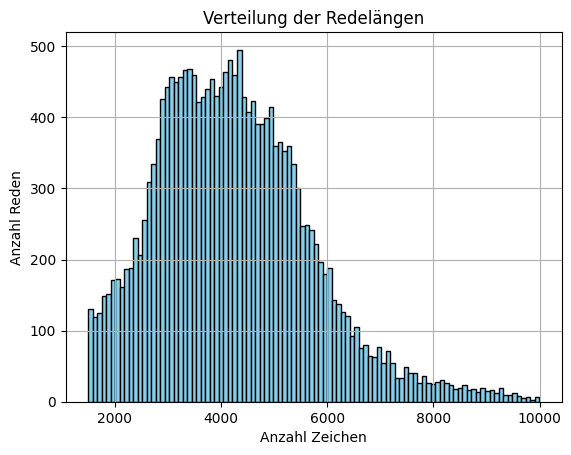

In [147]:
import matplotlib.pyplot as plt

plt.hist(text_laengen, bins=100, color="skyblue", edgecolor="black")
plt.title("Verteilung der Redelängen")
plt.xlabel("Anzahl Zeichen")
plt.ylabel("Anzahl Reden")
plt.grid(True)
plt.show()